Download Dataset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

--2022-05-18 13:27:11--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.53.112.109, 2600:1407:3400:49f::e59, 2600:1407:3400:48c::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.53.112.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   178MB/s    in 4.6s    

2022-05-18 13:27:16 (169 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



Unzip the Dataset

In [ ]:
!unzip kagglecatsanddogs_5340.zip

Streaming output truncated to the last 5000 lines.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflating: PetImages/Dog/5522.jpg  

Import Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

Create Dataframe for Input and Output

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name == 'Cat':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Cat/9480.jpg 0


In [ ]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True) #tron dataset
df.head()

images  label
0  PetImages/Dog/8153.jpg      1
1  PetImages/Dog/4468.jpg      1
2  PetImages/Dog/2860.jpg      1
3  PetImages/Cat/5070.jpg      0
4  PetImages/Dog/4654.jpg      1

Làm sạch dữ liệu

In [ ]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image) #hinh anh giong nhu tep luu duoi dang byte
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Dog/Thumbs.db',
 'PetImages/Cat/Thumbs.db',
 'PetImages/Dog/11702.jpg']

In [ ]:
# delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Exploratory Data Analysis

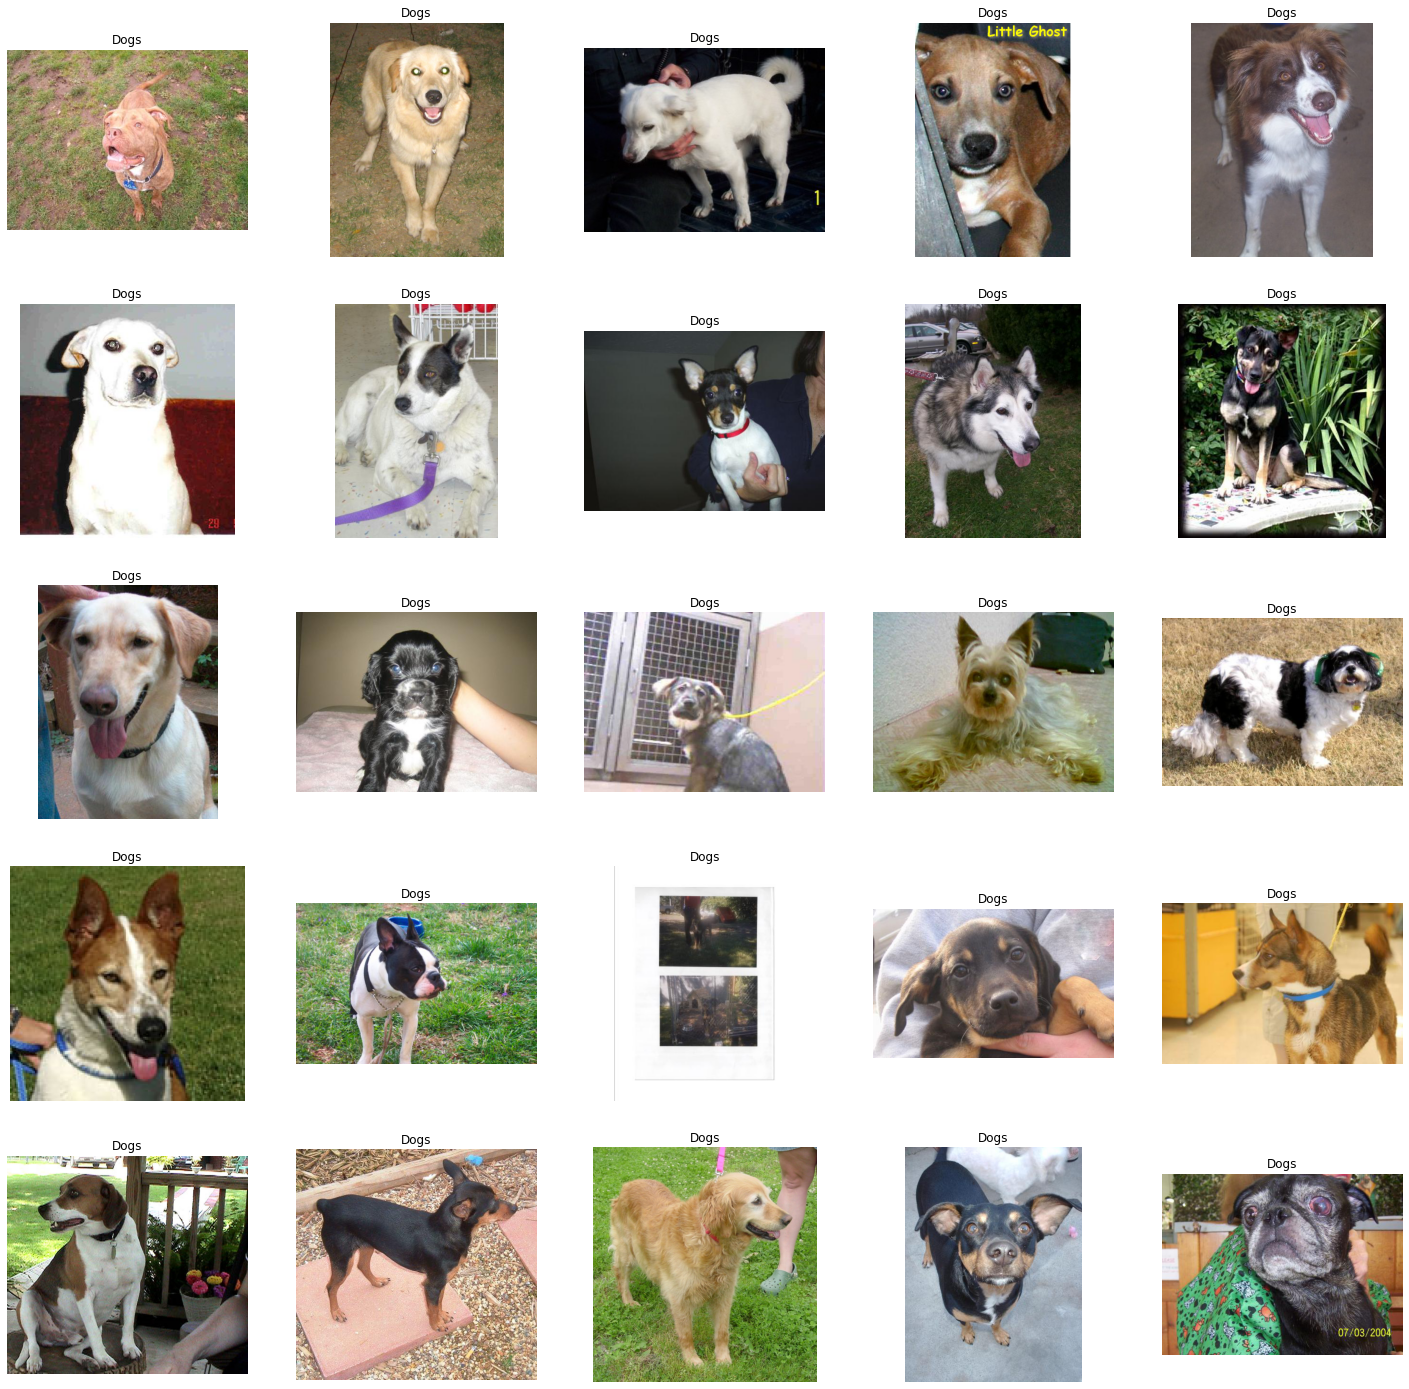

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

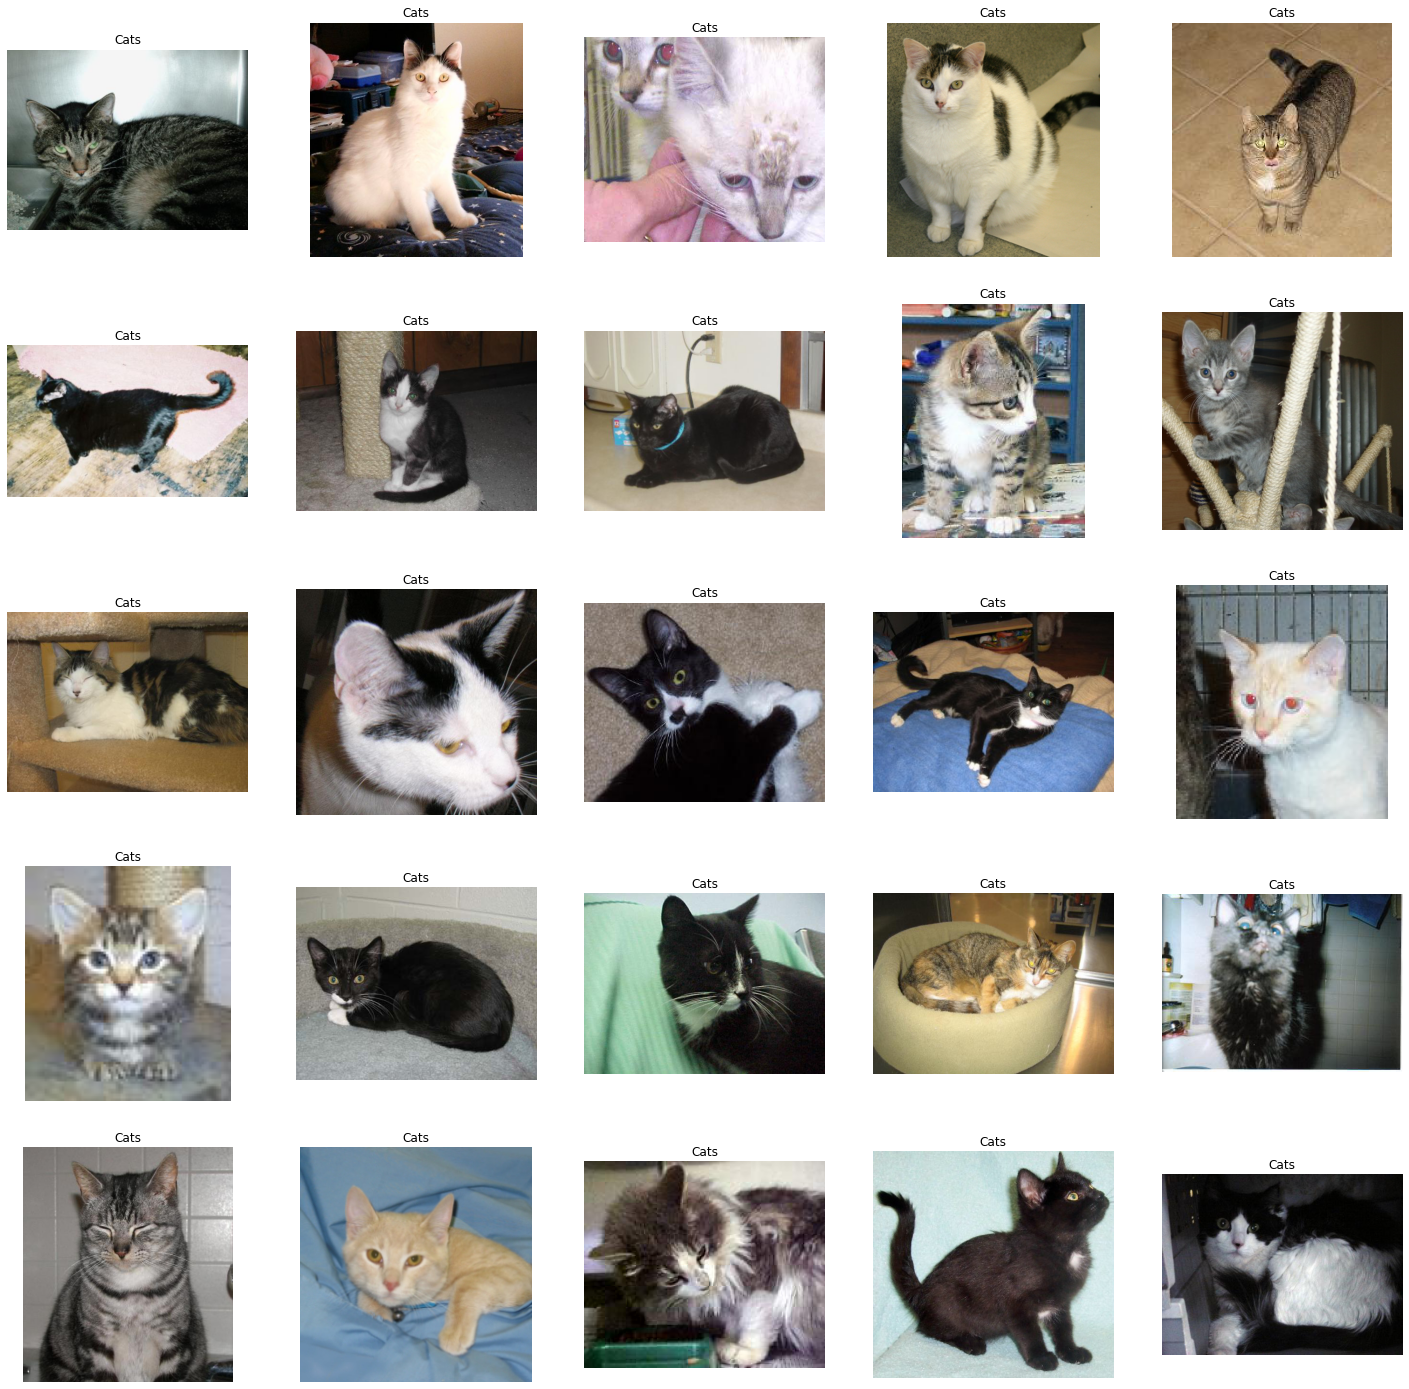

In [ ]:
# to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

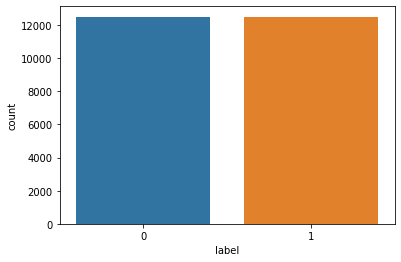

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

Create DataGenerator for the Images

In [ ]:
df['label'] = df['label'].astype('str') #chuyen kieu du lieu
df.head()

images label
0  PetImages/Dog/8153.jpg     1
1  PetImages/Dog/4468.jpg     1
2  PetImages/Dog/2860.jpg     1
3  PetImages/Cat/5070.jpg     0
4  PetImages/Dog/4654.jpg     1

In [ ]:
# input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # chuan hoa hinh anh thuong cac pixel nam trong khoang 0-255 => chuan hoa cac gtri pixel nam trong khoan tu 0-1 => de dang trong viec huan luyen mo hinh
    rotation_range = 40, # xoay hinh anh de tranh overfitting
    shear_range = 0.2, #pham vi cắt
    zoom_range = 0.2, #thu phóng hình ảnh
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test, 
    x_col='images', 
    y_col='label', 
    target_size=(128,128), 
    batch_size=64, 
    class_mode='binary'
)

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential([
                    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)), 
                    MaxPool2D((2,2)),

                    Conv2D(64, (3,3), activation='relu'), 
                    MaxPool2D((2,2)),

                    Conv2D(128, (3,3), activation='relu'),
                    MaxPool2D((2,2)),

                    Conv2D(128, (3,3), activation='relu'),
                    MaxPool2D((2,2)),

                    Flatten(),
                    Dense(512, activation='relu'),
                    Dropout(0.5), #Điều này có nghĩa là 50% giá trị trong lớp Dropout sẽ được đặt thành 0. Điều này giúp tránh overfitting.
                    Dense(2, activation='softmax') #Mô hình sẽ đưa ra xác suất cho hai lớp - chó và mèo 
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 128)     

In [ ]:
history = model.fit(train_iterator, epochs=30, validation_data=val_iterator)

Epoch 1/30
313/313 [==============================] - 134s 426ms/step - loss: 0.6565 - accuracy: 0.6011 - val_loss: 0.5899 - val_accuracy: 0.6808
Epoch 2/30
313/313 [==============================] - 130s 415ms/step - loss: 0.5714 - accuracy: 0.7023 - val_loss: 0.5188 - val_accuracy: 0.7370
Epoch 3/30
313/313 [==============================] - 129s 413ms/step - loss: 0.5095 - accuracy: 0.7468 - val_loss: 0.4517 - val_accuracy: 0.7898
Epoch 4/30
313/313 [==============================] - 129s 412ms/step - loss: 0.4625 - accuracy: 0.7789 - val_loss: 0.4159 - val_accuracy: 0.8028
Epoch 5/30
313/313 [==============================] - 129s 413ms/step - loss: 0.4226 - accuracy: 0.8045 - val_loss: 0.3564 - val_accuracy: 0.8384
Epoch 6/30
313/313 [==============================] - 129s 412ms/step - loss: 0.3854 - accuracy: 0.8278 - val_loss: 0.3325 - val_accuracy: 0.8546
Epoch 7/30
313/313 [==============================] - 129s 412ms/step - loss: 0.3553 - accuracy: 0.8434 - val_loss: 0.3306 -

Visualization of Results

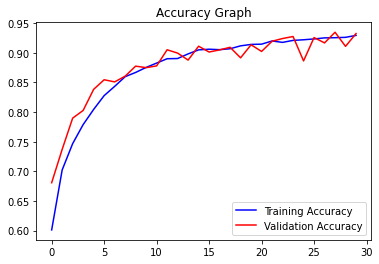

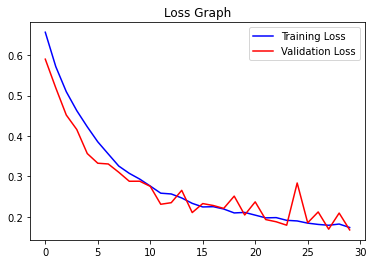

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

Save model

In [ ]:
model.save("model.h5")